## Report for FAIR's COVID19 Survey (01.04.2020-03.04.2020) 

#### Import packages

In [1]:
import os
import numpy as np
import pandas as pd

from textwrap import wrap
from matplotlib import pyplot as plt 
from matplotlib.ticker import FuncFormatter, PercentFormatter 
from matplotlib import dates as mdates

#### Set options

In [2]:
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

#### Set ploting properties

In [3]:
lege_kw = dict(frameon=False)
font_kw = dict(fontsize=11, color='k')
xlab_kw = dict(fontsize=11, labelpad=3)
ylab_kw = dict(fontsize=11, labelpad=3)
line_kw = dict(kind='line', lw=1, alpha=1, legend=True)
bar_kw  = dict(kind='bar', color='0.4', alpha=0.8, lw=0.5, width=0.7)
tick_kw = dict(which='both', direction='out', right=False, top=False, labelbottom=True, size=5)

#### Set folder directories

In [4]:
PROJECT_FOLDER        = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
RAW_DATA_FOLDER       = os.path.join(PROJECT_FOLDER, 'data', 'raw') 
PROCESSED_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'processed') 
TABLES_FOLDER         = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER        = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Read in survey data

In [5]:
df = pd.read_csv(os.path.join(RAW_DATA_FOLDER, 'covid_curvey.csv'))
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 25 entries, Start Date to Andre synspunkter til den pågående krisen eller denne studien.
dtypes: float64(18), object(7)
memory usage: 36.5+ KB


#### Print questions

In [6]:
for i, col in enumerate(df.columns):
    print(f'{i}:{col}\n')

0:Start Date

1:End Date

2:Q1 - Hva tror du endringen i fastlands-BNP (i faste priser) blir for Norge for hele 2020?

3:Q2 - Hva tror du arbeidsledigheten er i Norge ved utgangen av 2020? (Antall registrerte helt arbeidsledige i prosent av arbeidsstyrken)

4:Q3 - Effekten av koronakrisen for verdensøkonomien blir kortvarig: om ett år er veksten i verdensøkonomien akkurat som før krisen.

5:Q4 - På lang sikt vil coronakrisen føre til omfattende begrensninger på internasjonal handel og mobilitet av arbeidskraft og kapital.

6:Q5 - Det vil være behov for omfattende motkonjunkturpolitikk i Norge etter at myndighetene har avsluttet smitteverntiltakene.

7:Q6 - Det er behov for omfattende motkonjunkturpolitikk i Norge allerede nå – mens smitteverntiltakene pågår.

8:Q7 - Myndighetenes kostnader knyttet til coronakrisen bør i all hovedsak finansieres fra oljefondet

9:Q8 - Bedrifter bør få full kompensasjon for økonomiske tap som er en følge av myndighetenes smitteverntiltak.

10:Q9 - Det vi

### Survey meta statistics

In [7]:
for i in ['Start Date', 'End Date']:
    df[i] = pd.to_datetime(df[i])

duration = df['End Date'] - df['Start Date']
print(f'Mean survey duration: {duration.mean().seconds // 60} minutes.')

Mean survey duration: 46 minutes.


### Når svarer deltakerne?

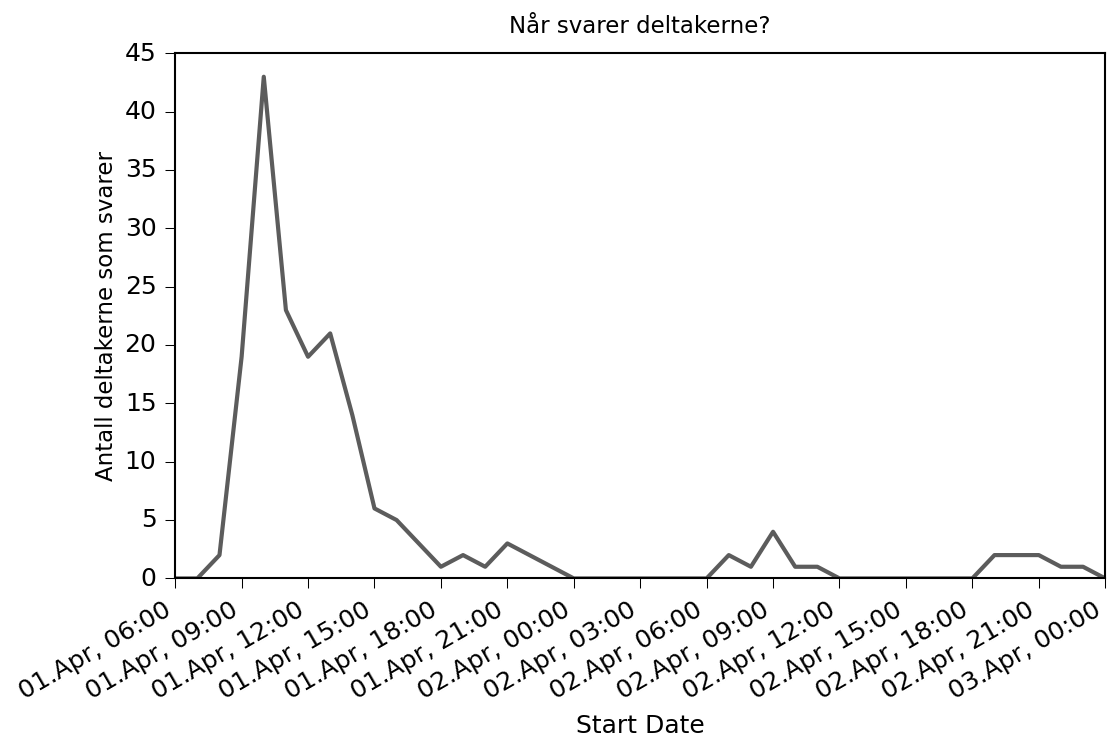

In [8]:
time_df = df\
    .set_index('Start Date')\
    .resample('H')\
    .count()['End Date']\
    .loc['2020-04-01 06:00:00':'2020-04-03 00:00:00']

hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d.%b, %H:%M')

with plt.style.context(('classic')):
    fig, ax = plt.subplots(figsize=(8, 5), dpi=150, facecolor='w')
    time_df.plot(ax=ax, color='0.2', alpha=0.8, linewidth=2, x_compat=True)
    ax.set_title('Når svarer deltakerne?' , pad=10, **font_kw)
    ax.tick_params(axis='x', rotation=30, **tick_kw)
    ax.tick_params(axis='y', **tick_kw)
    ax.set_ylabel("Antall deltakerne som svarer", **ylab_kw)
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    fig.savefig(os.path.join(FIGURES_FOLDER, 'tid.pdf'), bbox_inches='tight')

#### Select relevant columns

### Q1: Hva tror du endringen i fastlands-BNP (i faste priser) blir for Norge for hele 2020?

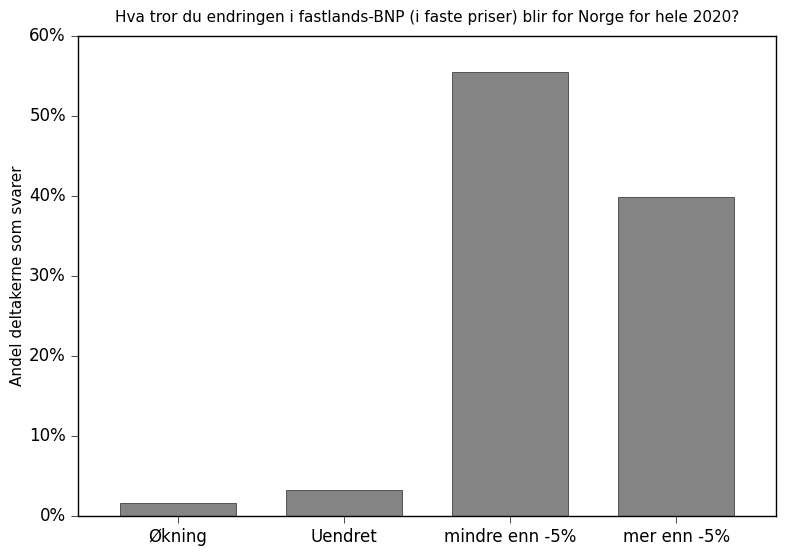

In [9]:
with plt.style.context(('classic')):
    fig, ax = plt.subplots(figsize=(9, 6), dpi=100, facecolor='w')
    ax.set_title(df.columns[2].split(' - ')[1], pad=10, **font_kw)
    df[df.columns[2]].value_counts(normalize=True).sort_index().plot(ax=ax, **bar_kw)
    ax.tick_params(axis='x', rotation=0, **tick_kw)
    ax.tick_params(axis='y', **tick_kw)
    ax.set_ylabel("Andel deltakerne som svarer", **ylab_kw)
    ax.set_xticklabels(['Økning', 'Uendret', 'mindre enn -5%', 'mer enn -5%'], fontsize=12)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    fig.savefig(os.path.join(FIGURES_FOLDER, 'q1.pdf'), bbox_inches='tight')

### Q2: Hva tror du arbeidsledigheten er i Norge ved utgangen av 2020? (Antall registrerte helt arbeidsledige i prosent av arbeidsstyrken)

#### Clean data

In [10]:
df[df.columns[3]] = df[df.columns[3]]\
    .str.replace('%', '')\
    .str.replace(',', '.')\
    .replace({'330':np.nan, '-34':'34'})

df[df.columns[3]] = pd.to_numeric(
    df[df.columns[3]], 
    errors='raise',
)                     

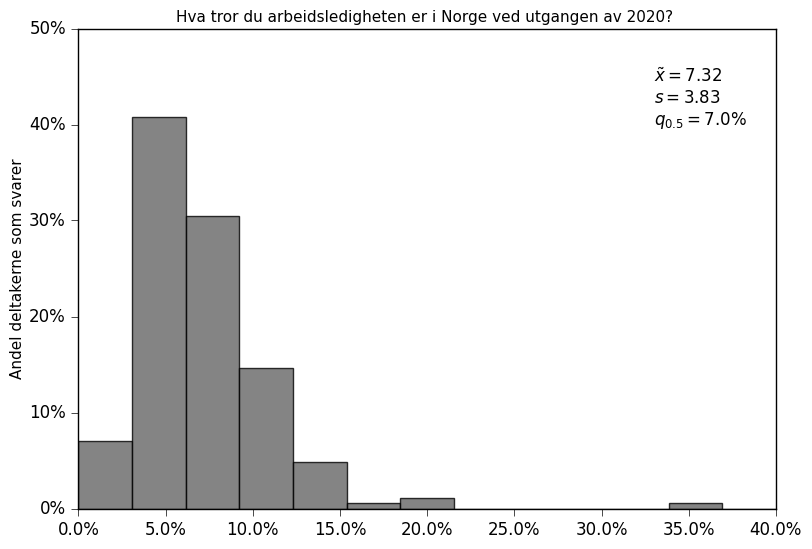

In [11]:
df_q2 = df.loc[df[df.columns[3]].notna(), df.columns[3]]
common_params = dict(range=(0, 40), bins=13, color='0.4', alpha=0.8, grid=False)
with plt.style.context(('classic')):
    fig, ax = plt.subplots(figsize=(9, 6), dpi=100, facecolor='w')
    ax.set_title(df_q2.name.split(' - ')[1][:-67], **font_kw)
    df_q2.hist(ax=ax, weights=np.ones(len(df_q2)) / len(df_q2), **common_params)
    ax.tick_params(axis='x', rotation=0, **tick_kw)
    ax.tick_params(axis='y', **tick_kw)
    ax.set_ylim([0, 0.50])
    ax.set_ylabel("Andel deltakerne som svarer", **ylab_kw)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(PercentFormatter())
    mean, std, med = df_q2.mean(), df_q2.std(), df_q2.median()
    legend = f"$\~{{x}}={mean:.2f}$\n$s={std:.2f}$\n$q_{{0.5}}={med:.1f}$%"
    ax.text(33, 0.4 , legend)
    fig.savefig(os.path.join(FIGURES_FOLDER, 'q2.pdf'), bbox_inches='tight')

#### Recode likert scale responses to range 0 to 10 

In [12]:
df_block = df\
    .loc[:, df.columns[4:21]]\
    .applymap(lambda x: x-1)\

### Q3-Q19: I hvor stor grad er du enig eller uenig med følgende utsagn (0=Helt uenig, 10=Helt enig):

In [13]:
df_agg = df_block\
    .agg(['mean', 'sem', 'count'])\
    .transpose()\
    .rename(lambda x: x.capitalize(), axis=1)\
    .rename_axis('Spørsmål', axis=0)\
    
df_agg.style\
    .format(subset=['Count'], formatter='{:.0f}'.format)\
    .format(subset=['Mean'], formatter='{:.2f}'.format)\
    .background_gradient(subset=['Mean'], cmap='coolwarm')\
    .hide_columns(['Sem', 'Count'])

,Mean
Spørsmål,
Q3 - Effekten av koronakrisen for verdensøkonomien blir kortvarig: om ett år er veksten i verdensøkonomien akkurat som før krisen.,4.04
Q4 - På lang sikt vil coronakrisen føre til omfattende begrensninger på internasjonal handel og mobilitet av arbeidskraft og kapital.,3.78
Q5 - Det vil være behov for omfattende motkonjunkturpolitikk i Norge etter at myndighetene har avsluttet smitteverntiltakene.,7.09
Q6 - Det er behov for omfattende motkonjunkturpolitikk i Norge allerede nå – mens smitteverntiltakene pågår.,6.49
Q7 - Myndighetenes kostnader knyttet til coronakrisen bør i all hovedsak finansieres fra oljefondet,5.74
Q8 - Bedrifter bør få full kompensasjon for økonomiske tap som er en følge av myndighetenes smitteverntiltak.,5.01
"Q9 - Det vil være rettferdig å gi bedrifter full kompensasjon for økonomiske tap som er en følge av myndighetenes smitteverntiltak, siden disse tiltakene er utenfor bedriftenes kontroll og gjennomføres for fellesskapet beste.",5.54
"Q10 - Det er effektivt å støtte bedrifter som har økonomiske tap som er en følge av myndighetenes smitteverntiltak, siden mange av disse bedriftene vil være levedyktige når myndighetene avslutter smitteverntiltakene.",7.15
Q11 - Personer som er permitterte som en følge av myndighetenes smitteverntiltak bør få full lønnskompensasjon så lenge smitteverntiltakene vedvarer.,6.47


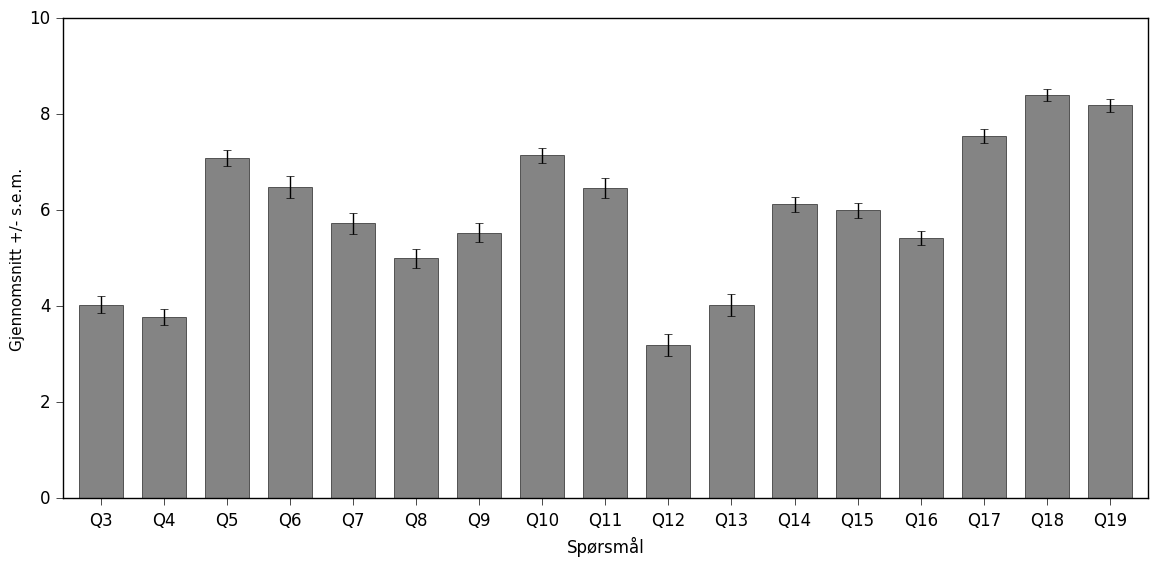

In [14]:
with plt.style.context(('classic')):
    fig, ax = plt.subplots(figsize=(14, 6), dpi=100, facecolor='w')
    df_agg['Mean'].plot(ax=ax, yerr=df_agg['Sem'], **bar_kw)
    ax.tick_params(axis='x', rotation=0, **tick_kw)
    ax.tick_params(axis='y', **tick_kw)
    ax.set_xticklabels([x.split(' - ')[0] for x in df_agg.index])
    ax.set_ylabel("Gjennomsnitt +/- s.e.m.", **ylab_kw)
    ax.set_ylim([0,10])

### Correlation matrix, Q3-Q19

In [15]:
df_corr = df_block\
    .rename(lambda x: x.split(' - ')[0], axis=1)\
    .dropna()\
    .corr()\
    .style.background_gradient(cmap='coolwarm')\
    .set_precision(2)

display(df_corr)

,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
Q3,1.00,-0.28,-0.27,-0.03,0.06,0.05,0.12,-0.05,0.03,-0.06,-0.07,0.14,0.11,0.05,-0.06,-0.10,-0.08
Q4,-0.28,1.00,0.07,0.03,0.00,0.00,-0.05,-0.21,-0.15,0.11,0.03,0.01,-0.05,0.08,-0.00,-0.02,0.02
Q5,-0.27,0.07,1.00,0.27,0.13,0.14,0.04,0.10,0.18,0.14,-0.13,0.09,0.11,0.03,0.13,0.20,0.19
Q6,-0.03,0.03,0.27,1.00,0.16,0.02,0.04,0.10,0.08,0.03,-0.14,0.23,0.14,0.04,0.10,0.16,0.01
Q7,0.06,0.00,0.13,0.16,1.00,0.11,0.12,0.06,-0.06,0.00,0.01,0.05,0.09,0.11,0.10,-0.01,0.09
Q8,0.05,0.00,0.14,0.02,0.11,1.00,0.71,0.32,0.41,0.08,-0.12,0.17,0.21,0.05,0.43,0.23,0.26
Q9,0.12,-0.05,0.04,0.04,0.12,0.71,1.00,0.30,0.37,0.03,0.02,0.09,0.20,0.09,0.34,0.14,0.18
Q10,-0.05,-0.21,0.10,0.10,0.06,0.32,0.30,1.00,0.13,-0.09,-0.04,0.14,0.10,0.05,0.50,0.23,0.36
Q11,0.03,-0.15,0.18,0.08,-0.06,0.41,0.37,0.13,1.00,0.25,-0.15,0.11,0.21,0.12,0.24,0.33,0.18
Q12,-0.06,0.11,0.14,0.03,0.00,0.08,0.03,-0.09,0.25,1.00,-0.10,0.05,0.00,0.09,-0.09,0.08,-0.04


### Plot response frequency per item

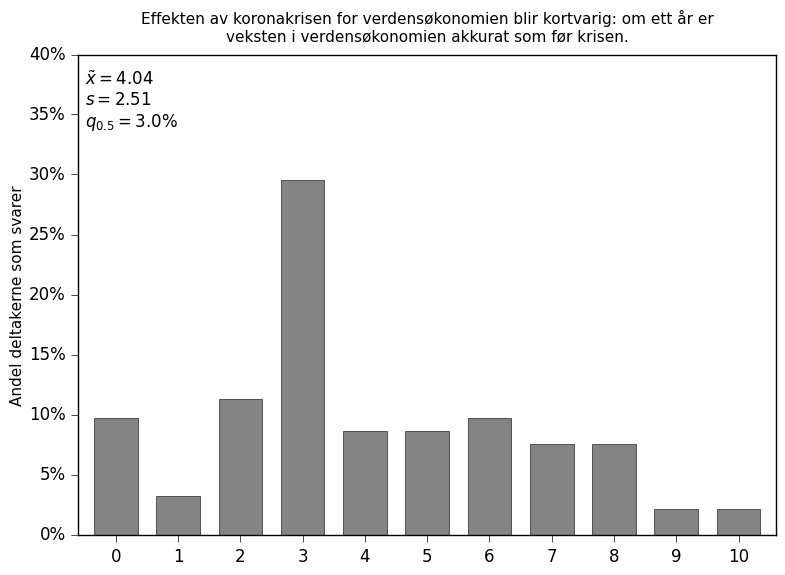

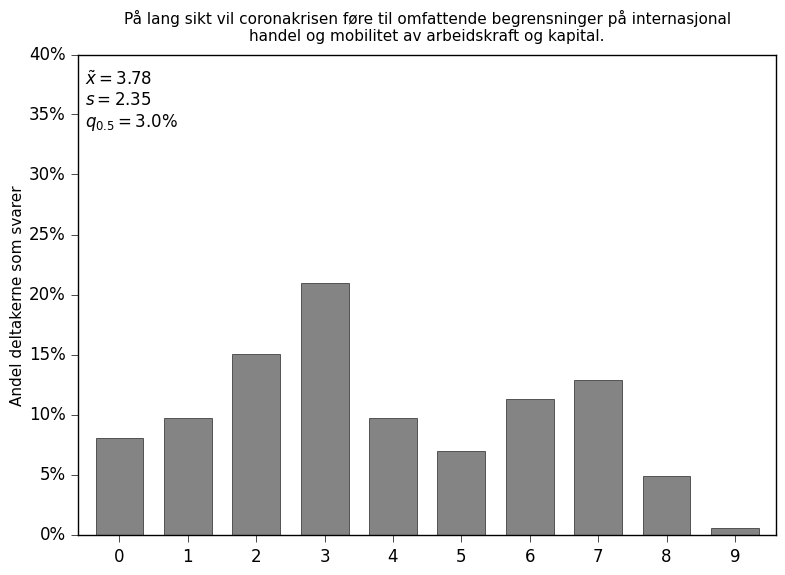

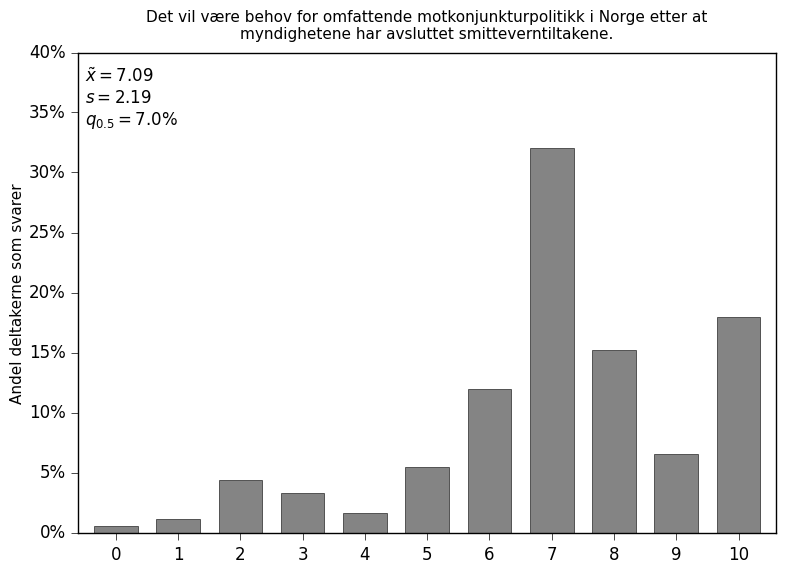

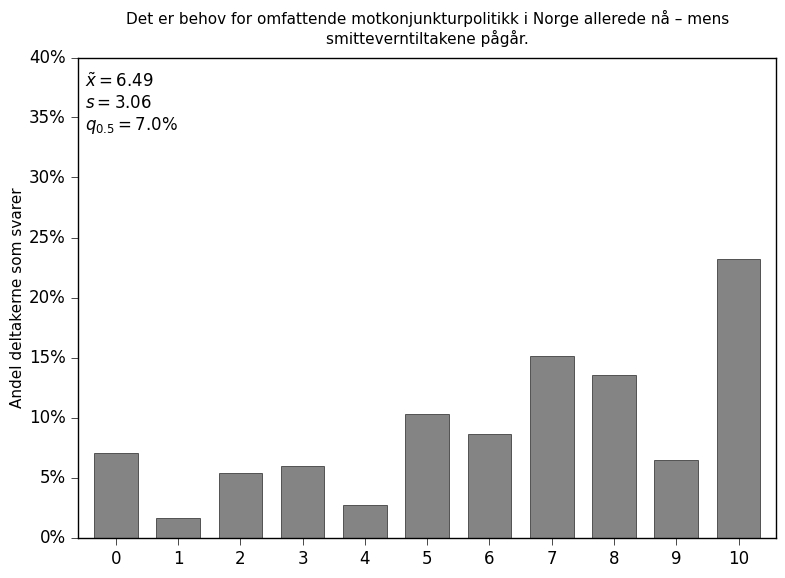

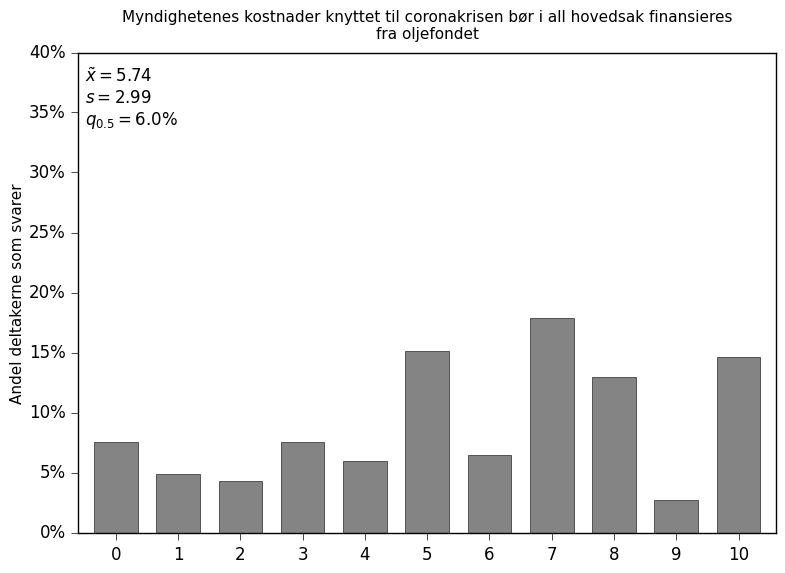

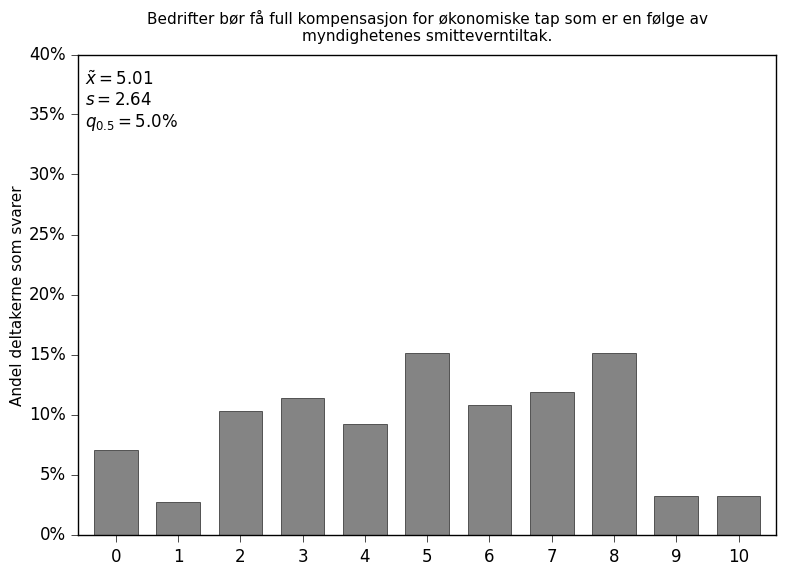

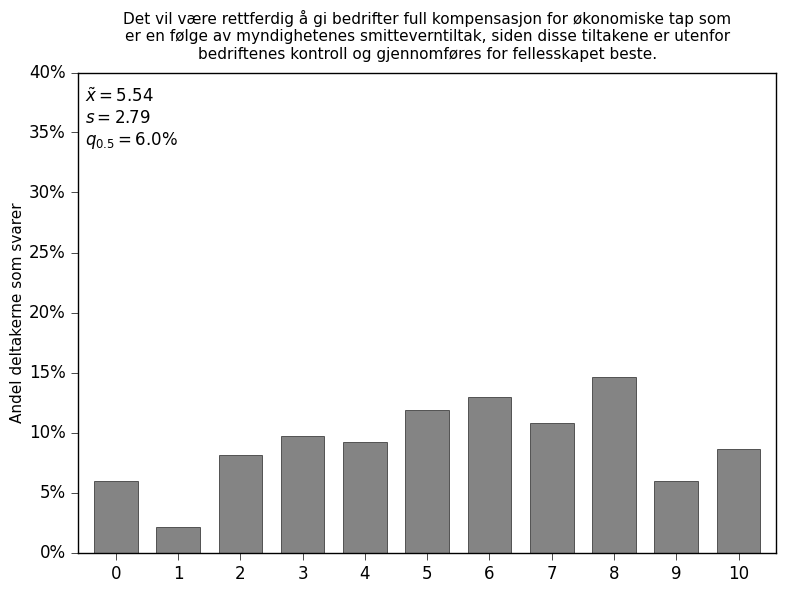

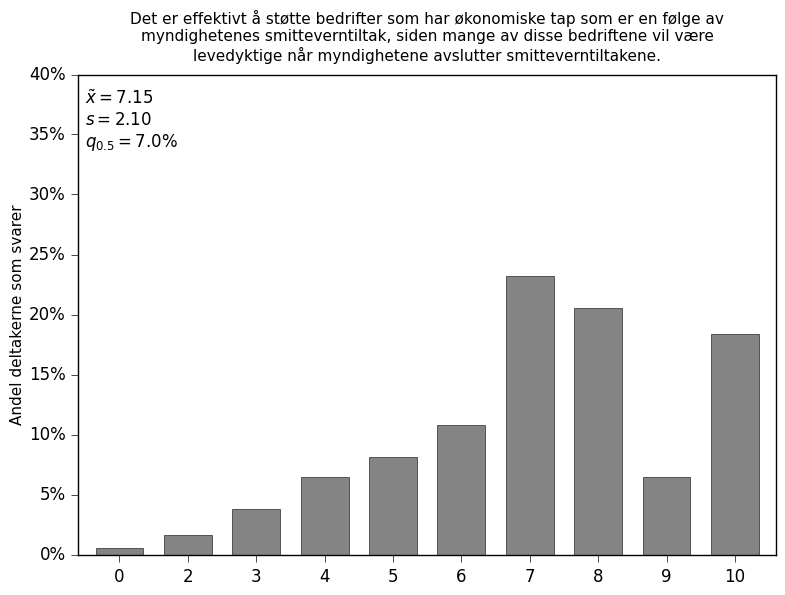

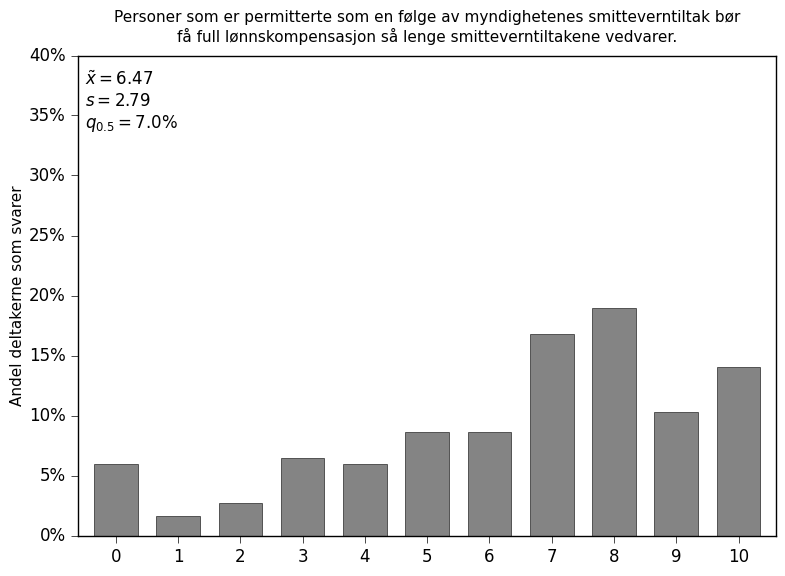

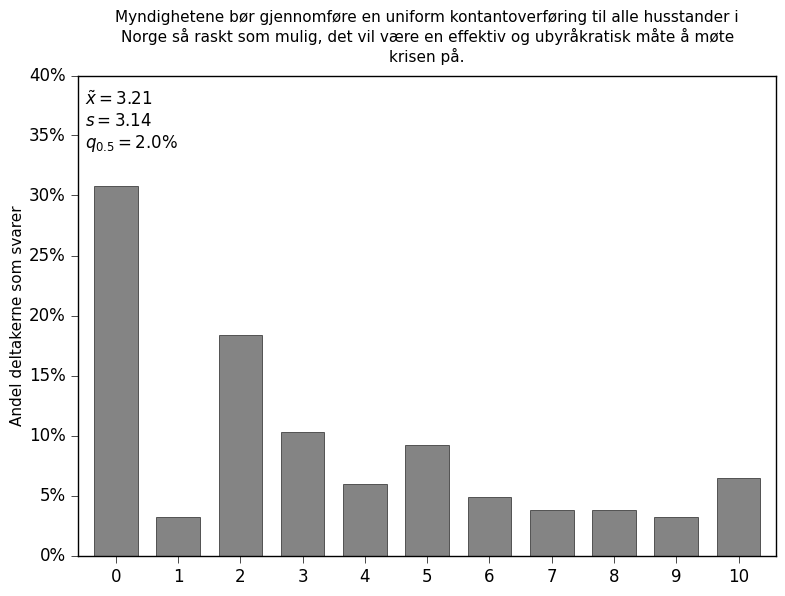

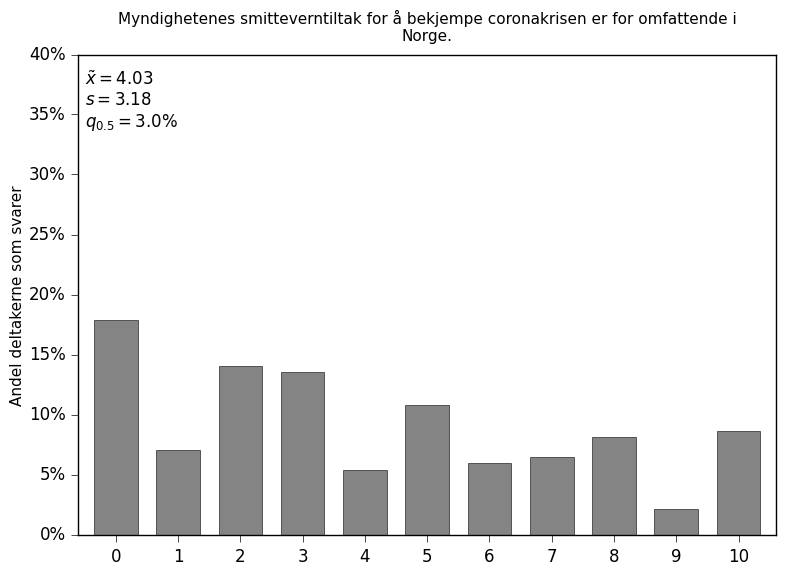

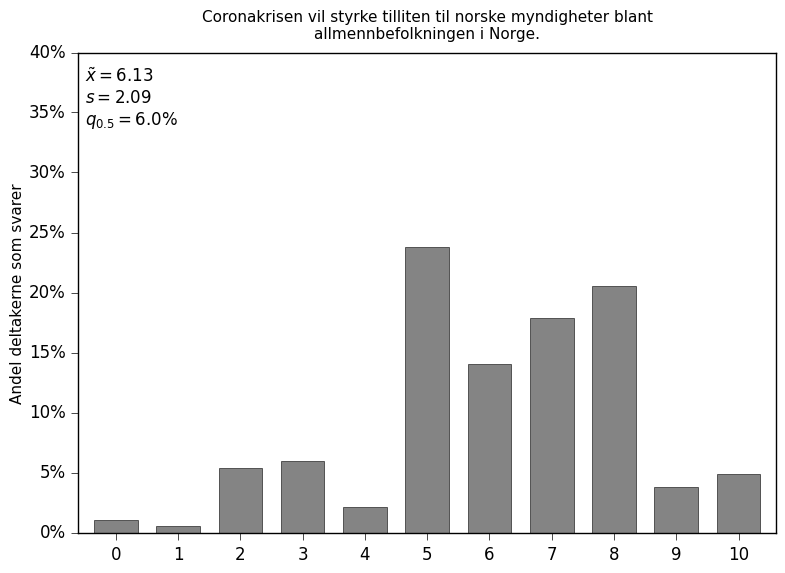

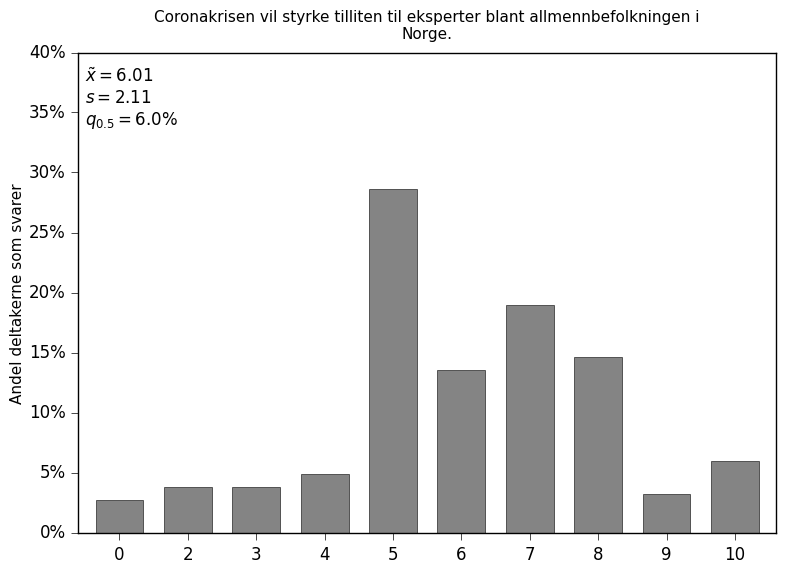

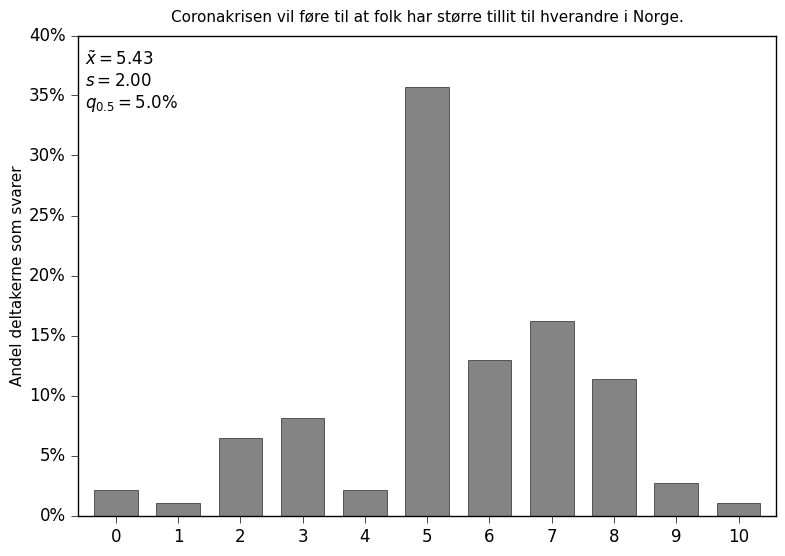

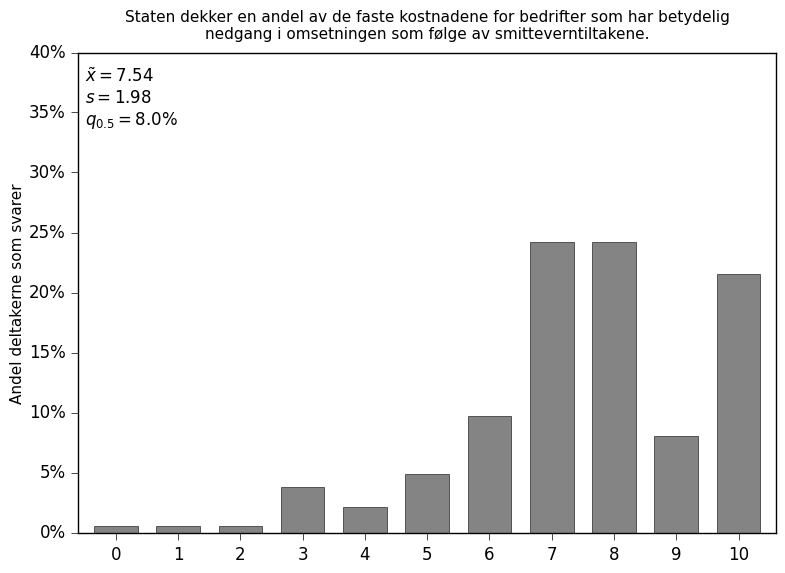

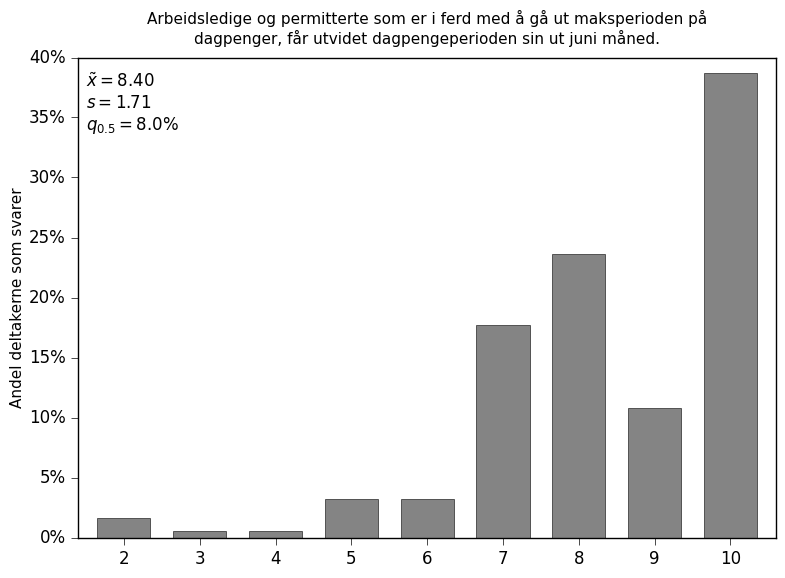

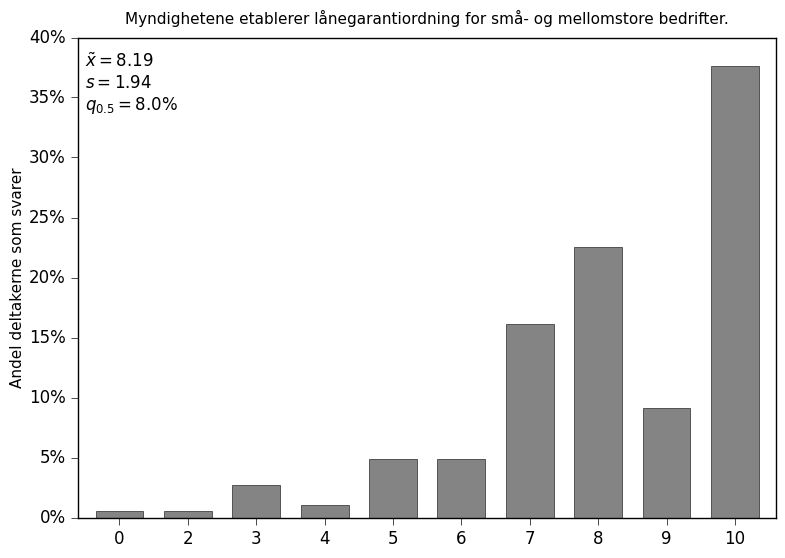

In [16]:
with plt.style.context(('classic')):
    for i in df_block:
        freq = df_block.loc[:,i].dropna(axis=0).astype(int)
        mean, std, med = freq.mean(), freq.std(), freq.median()    
        legend = f"$\~{{x}}={mean:.2f}$\n$s={std:.2f}$\n$q_{{0.5}}={med:.1f}$%"
        fig, ax = plt.subplots(figsize=(9, 6), dpi=100, facecolor='w')
        freq.value_counts(normalize=True).sort_index().plot(ax=ax, **bar_kw)
        ax.set_title("\n".join(wrap(freq.name.split(' - ')[1], 80)), pad=10, **font_kw)
        ax.tick_params(axis='x', rotation=0, **tick_kw)
        ax.tick_params(axis='y', **tick_kw)
        ax.set_ylim(0, 0.4)
        ax.set_ylabel("Andel deltakerne som svarer", **ylab_kw)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        ax.text(-0.5, 0.34, legend)
        fig.savefig(os.path.join(FIGURES_FOLDER, f"{i.split(' - ')[0].lower()}.pdf"), bbox_inches='tight')

#### Make simplified categories

In [17]:
def mapper(value):
    if value < 5:
        result = 'Uenig'
    elif value == 5:
        result = 'Nøytral'
    elif value > 5:
        result = 'Enig'
    else:
        result = np.nan
    return result
        
df_block = df_block.applymap(mapper)

### Plot response frequency per item, collapsed categories

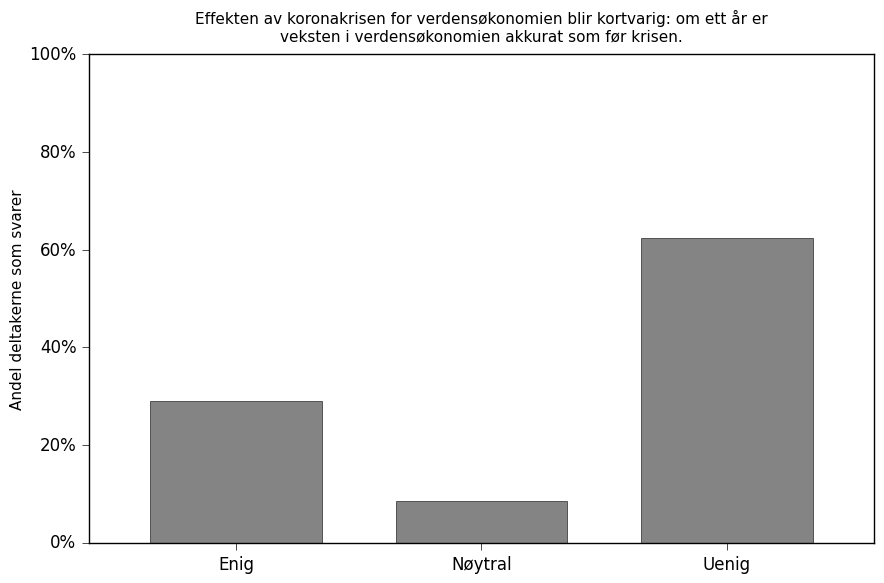

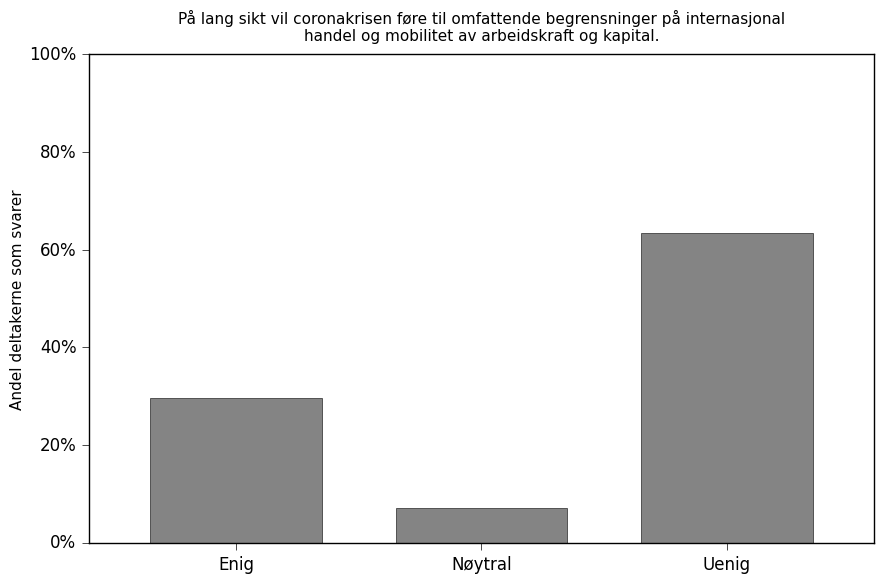

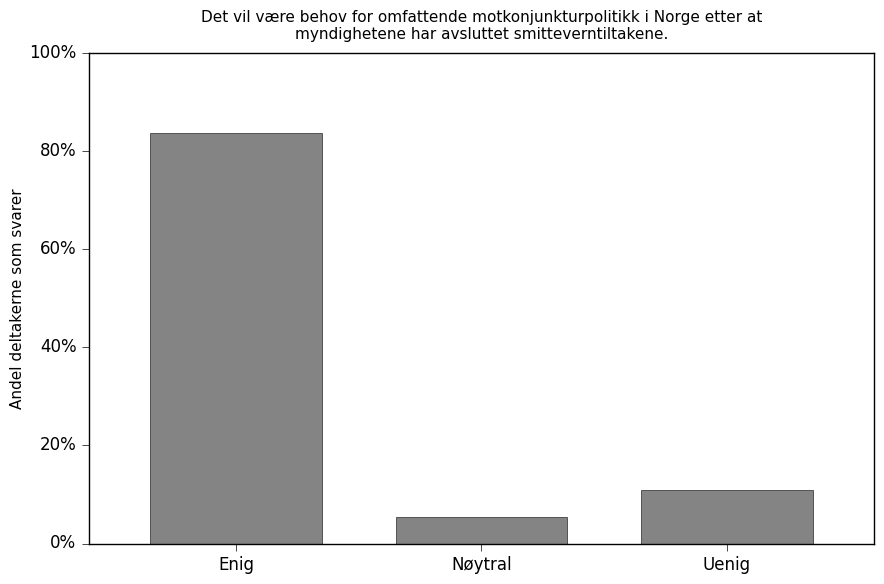

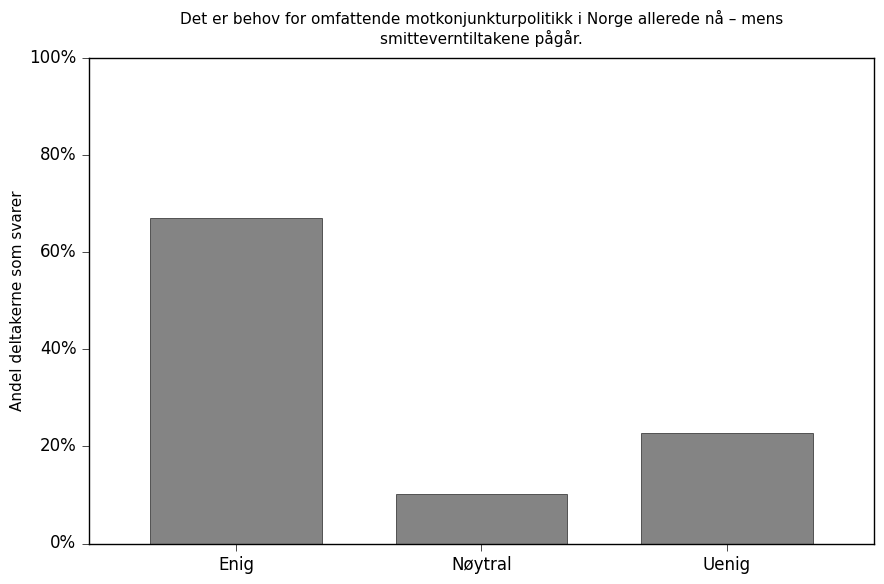

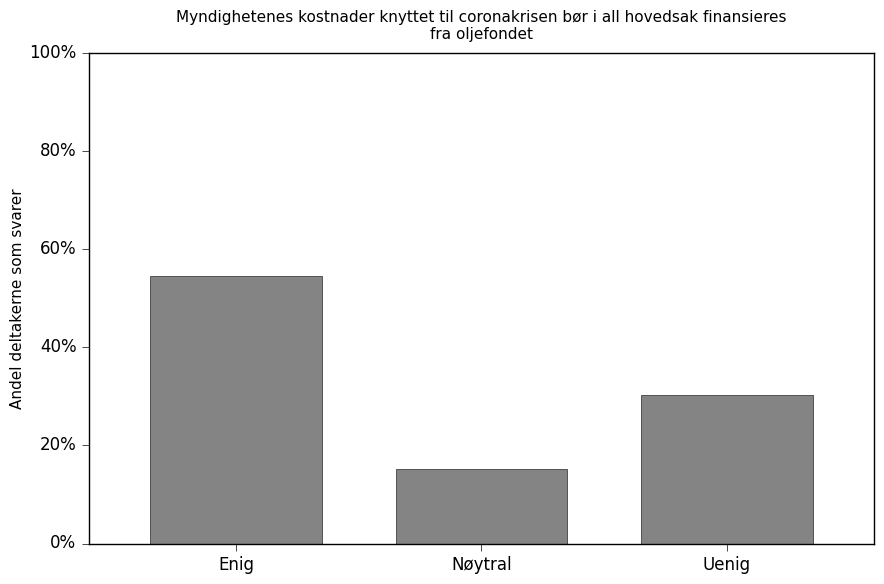

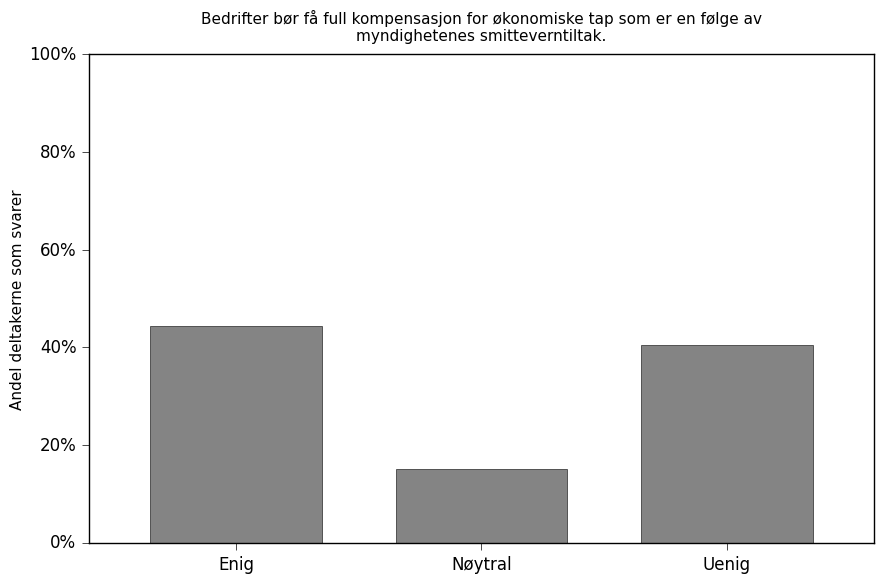

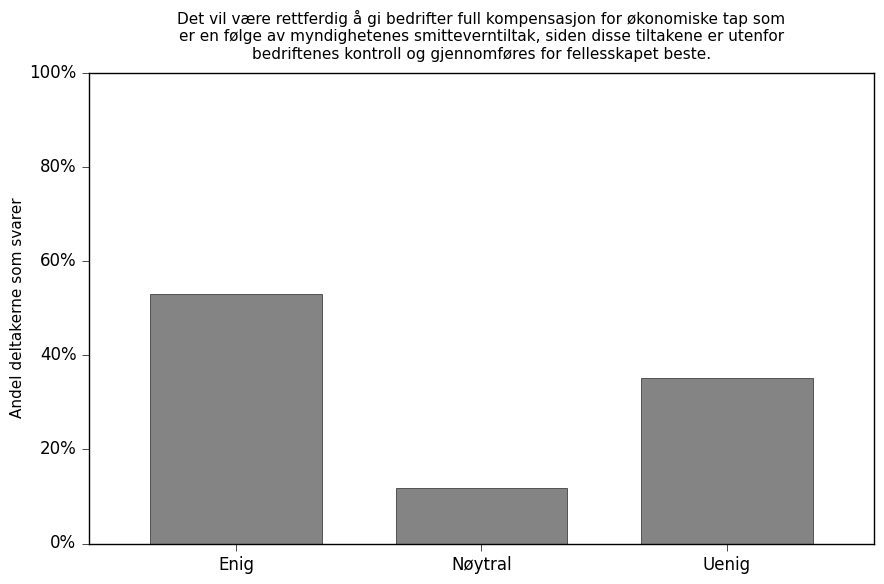

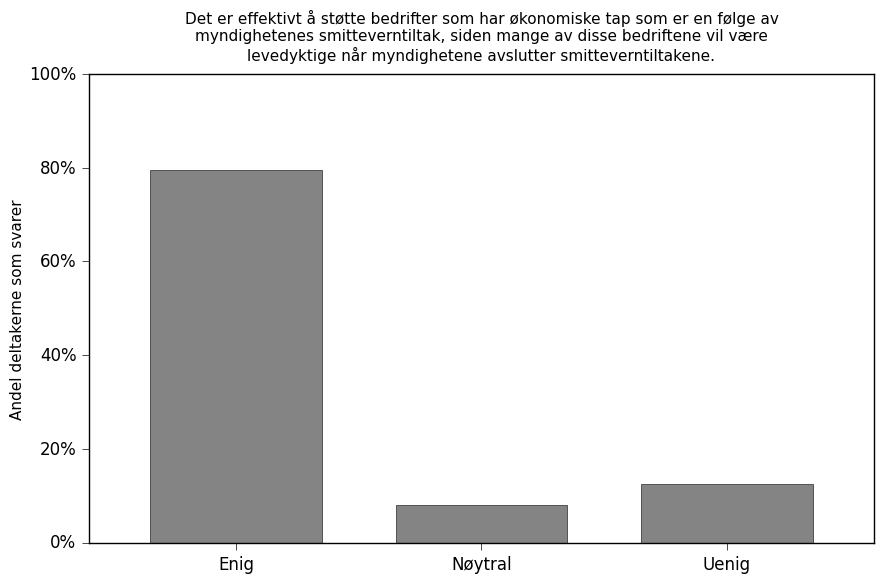

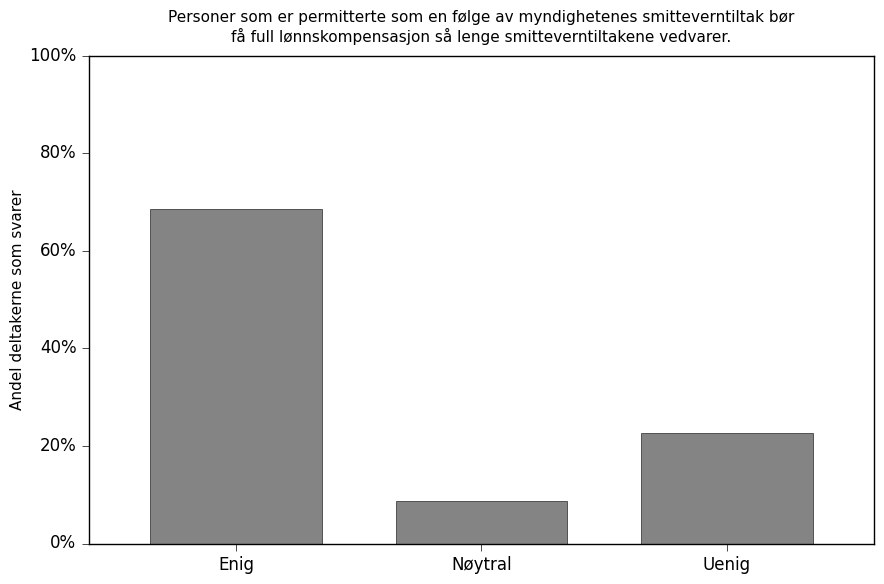

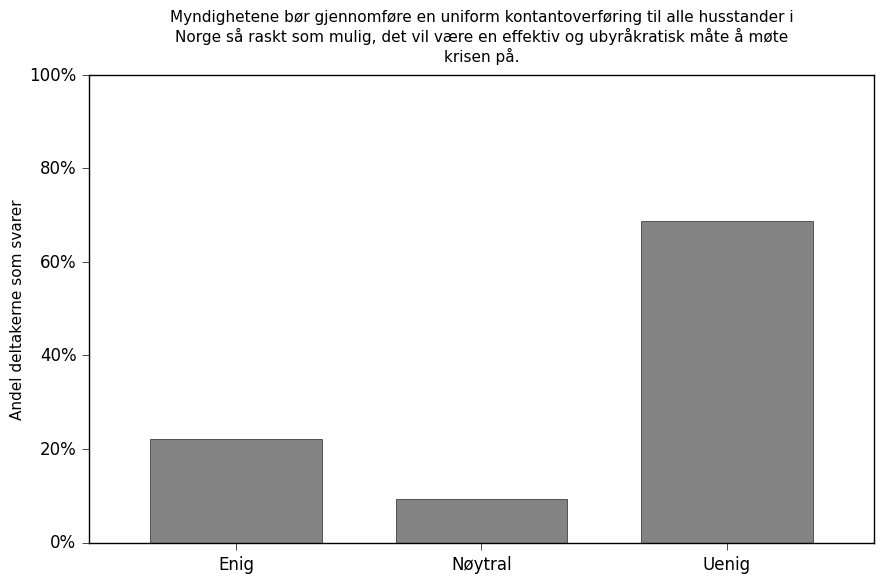

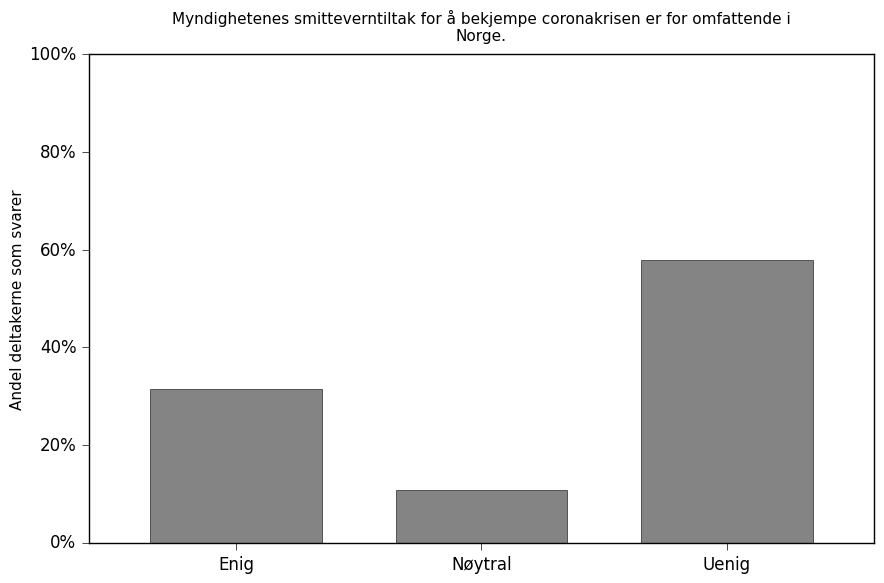

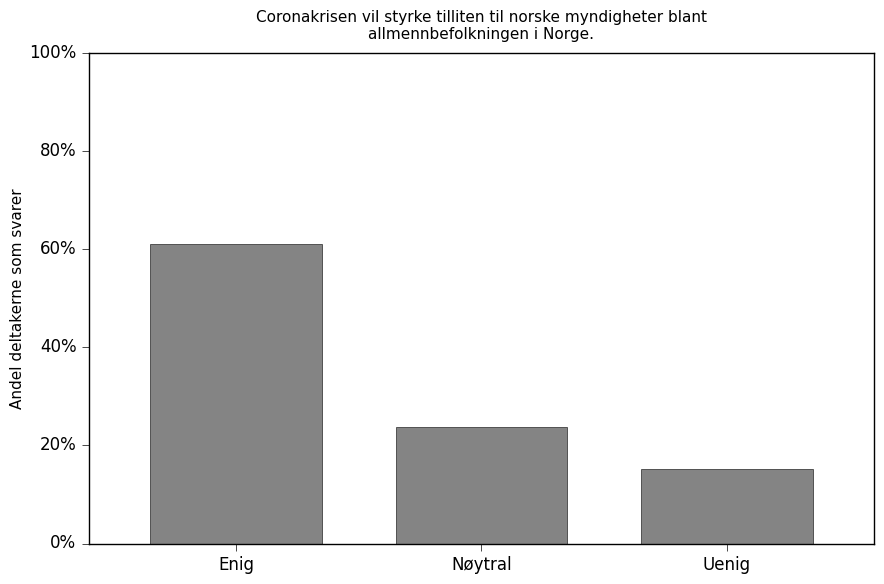

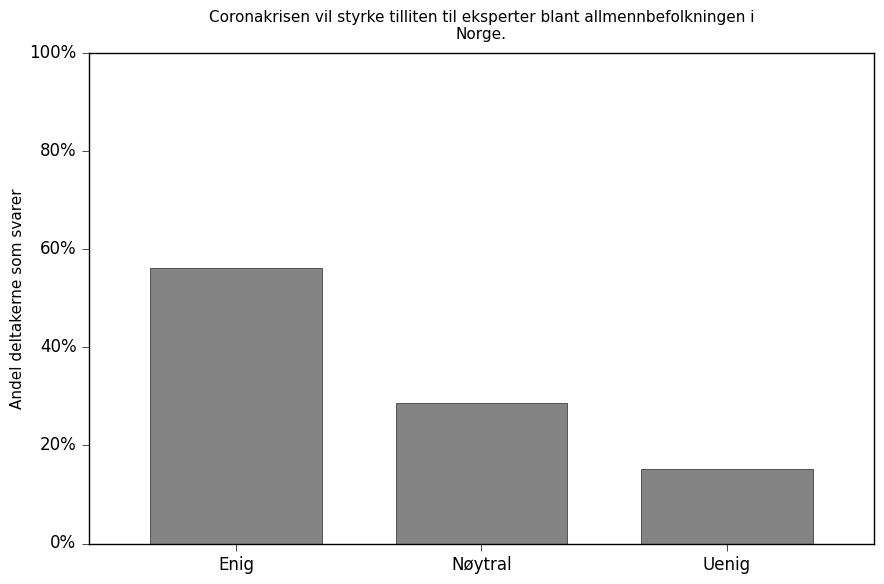

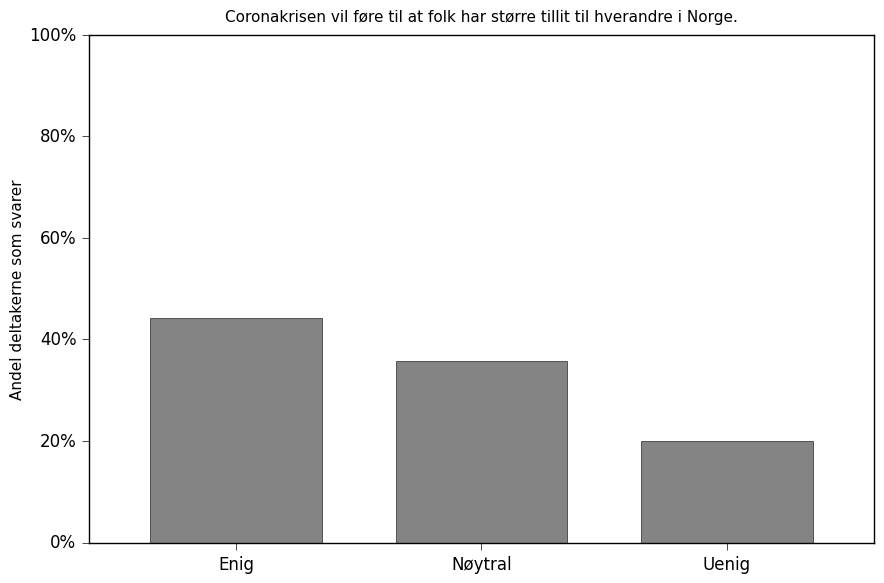

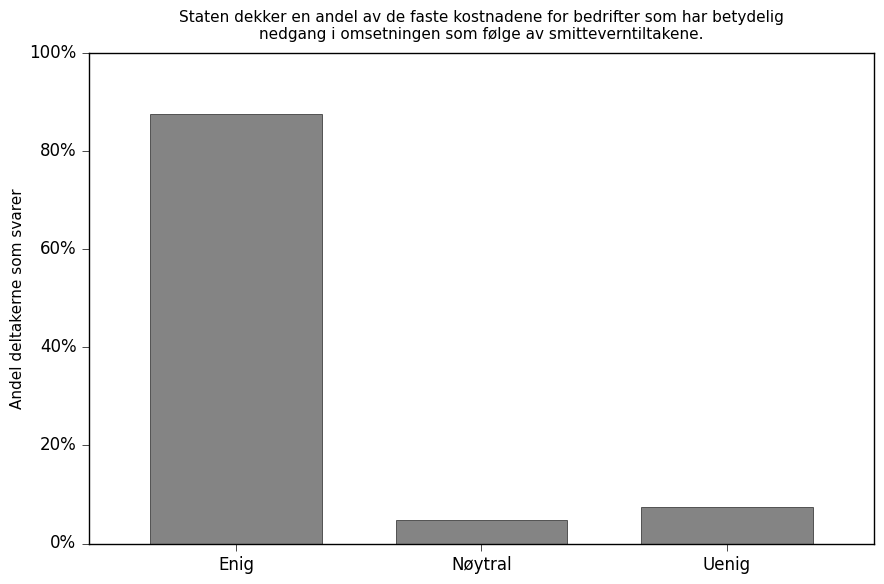

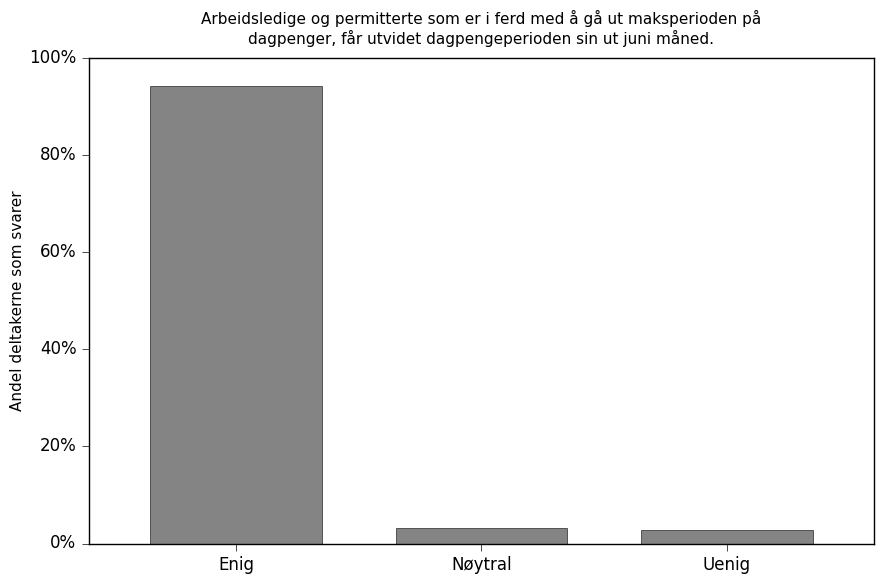

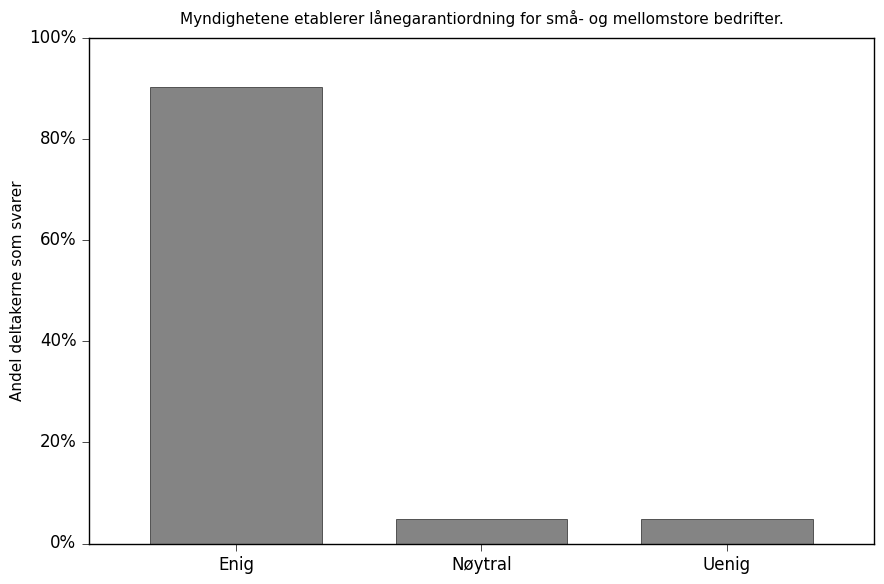

In [18]:
with plt.style.context(('classic')):
    for i in df_block:
        fig, ax = plt.subplots(figsize=(9, 6), dpi=100, facecolor='w')
        df_block.loc[:,i].value_counts(normalize=True).sort_index().plot(ax=ax, **bar_kw)
        ax.set_title("\n".join(wrap(df_block.loc[:,i].name.split(' - ')[1], 80)), pad=10, **font_kw)
        ax.tick_params(axis='x', rotation=0, **tick_kw)
        ax.tick_params(axis='y', **tick_kw)
        ax.set_ylim(0, 1.0)
        ax.set_ylabel("Andel deltakerne som svarer", **ylab_kw)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        fig.tight_layout()
        fig.savefig(os.path.join(FIGURES_FOLDER, f"{i.split(' - ')[0].lower()}_min.pdf"))

#### Export text asnwers

In [19]:
text_df = df\
    .iloc[:, -4:]\
    .dropna(how='all')

text_df.to_html(os.path.join(TABLES_FOLDER, 'Q20_q22.html'))
display(text_df)

,Q20 - Hvilket av smitteverntiltakene er mest skadelig for norsk økonomi?,Q21 - Hvilket økonomiske tiltak er det viktigste at myndighetene gjennomfører nå?,Q22 - Hvilket økonomiske tiltak er det viktigste at myndighetene gjennomfører når smitteverntiltakene oppheves?,Andre synspunkter til den pågående krisen eller denne studien.
4,"not sure, need more data",Subsidies and financial support to firms,Invest money to prepare for possible relapse o...,good initiative
5,NaN,"unemployment support, support for small an...",expansionary fiscal policies,NaN
6,Shutting down kindergardens and schools,Support for workers and firms impacted (SPEND ...,Spend whatever it takes to get people buying s...,"First, I was confused about the unemployment q..."
7,Ones that forces business to close,Support business and borrowers,Financing for business to start up again,NaN
9,Travel restrictions,Universal basic income,NaN,NaN
...,...,...,...,...
180,Stengningen av skoler og barnehager,Dekke opp for deler av inntektsbortfall både f...,Fortsatt dekke opp for deler av krisegenerert ...,"Ved eventuelt fundamental etterspørselssvikt, ..."
181,Nedstengning av arbeidsplasser,Kontantstøtte,Lånegarantier,NaN
182,"Ikke godt å si, det er en slags pakke. Men ant...","Støtte til bedrifter, med mekanismer som i stø...",Avvikling av støtteordninger for bedrifter og ...,Som alle studier av denne typen: Vanskelig å v...
183,nedgang i tjenesteytende,ledighetstrygd,åpne skoler og barnehager,negative fordelingseffekter må kompenseres og ...


#### Save to html

In [20]:
os.system('jupyter nbconvert --to html covid19_summary.ipynb')

256